In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('toprankedanime.csv')
df.head()

,name,type,episodes,status,aired,premiered,broadcast,producers,licensors,studios,source,genres,duration,rating,score,ranked,popularity,favorites
0,Sousou no Frieren,TV,28,Finished Airing,"Sep 29, 2023 to Mar 22, 2024",Fall 2023,Fridays at 23:00 (JST),"['Aniplex', 'Dentsu', 'Shogakukan-Shueisha Pro...",['add some'],Madhouse,Manga,"['Adventure', 'Drama', 'Fantasy']",24 min. per ep.,PG-13 - Teens 13 or older,9.36,#1,#259,"43,524"
1,Steins;Gate,TV,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,Wednesdays at 02:05 (JST),"['Frontier Works', 'Media Factory', 'Kadokawa ...",['Funimation'],White Fox,NaN,"['Drama', 'Sci-Fi', 'Suspense']",24 min. per ep.,PG-13 - Teens 13 or older,9.07,#3,#13,"189,803"
2,Fullmetal Alchemist: Brotherhood,TV,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,Sundays at 17:00 (JST),"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']",Bones,Manga,"['Action', 'Adventure', 'Drama', 'Fantasy']",24 min. per ep.,R - 17+ (violence & profanity),9.09,#2,#3,"226,283"
3,Gintama°,TV,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,Wednesdays at 18:00 (JST),"['TV Tokyo', 'Aniplex', 'Dentsu']","['Funimation', 'Crunchyroll']",Bandai Namco Pictures,Manga,"['Action', 'Comedy', 'Sci-Fi']",24 min. per ep.,PG-13 - Teens 13 or older,9.06,#4,#343,"16,685"
4,Shingeki no Kyojin Season 3 Part 2,TV,10,Finished Airing,"Apr 29, 2019 to Jul 1, 2019",Spring 2019,Mondays at 00:10 (JST),"['Production I.G', 'Dentsu', 'Mainichi Broadca...",['Funimation'],Wit Studio,Manga,"['Action', 'Drama', 'Suspense']",23 min. per ep.,R - 17+ (violence & profanity),9.05,#5,#21,"58,822"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023 entries, 0 to 2022
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        2023 non-null   object 
 1   type        2023 non-null   object 
 2   episodes    2023 non-null   object 
 3   status      2023 non-null   object 
 4   aired       2023 non-null   object 
 5   premiered   1035 non-null   object 
 6   broadcast   1035 non-null   object 
 7   producers   2023 non-null   object 
 8   licensors   2023 non-null   object 
 9   studios     2023 non-null   object 
 10  source      1365 non-null   object 
 11  genres      2023 non-null   object 
 12  duration    2023 non-null   object 
 13  rating      2023 non-null   object 
 14  score       2023 non-null   float64
 15  ranked      2023 non-null   object 
 16  popularity  2023 non-null   object 
 17  favorites   2023 non-null   object 
dtypes: float64(1), object(17)
memory usage: 284.6+ KB


In [4]:
df.shape

(2023, 18)

In [5]:
df.isnull().sum()

name            0
type            0
episodes        0
status          0
aired           0
premiered     988
broadcast     988
producers       0
licensors       0
studios         0
source        658
genres          0
duration        0
rating          0
score           0
ranked          0
popularity      0
favorites       0
dtype: int64

In [6]:
df['source'].value_counts()

Manga           1018
Light novel      223
Web manga         75
4-koma manga      49
Name: source, dtype: int64

##### Let's extract only the year from the aired column so that we can come to know the year-release date.

In [7]:
# Change 'aired' column to type string
df['aired'] = df['aired'].astype(str)

# Extract the first year and store it in a new column 'start_year'
df['start_year'] = df['aired'].str.extract(r'(\d{4})')

df.head()

,name,type,episodes,status,aired,premiered,broadcast,producers,licensors,studios,source,genres,duration,rating,score,ranked,popularity,favorites,start_year
0,Sousou no Frieren,TV,28,Finished Airing,"Sep 29, 2023 to Mar 22, 2024",Fall 2023,Fridays at 23:00 (JST),"['Aniplex', 'Dentsu', 'Shogakukan-Shueisha Pro...",['add some'],Madhouse,Manga,"['Adventure', 'Drama', 'Fantasy']",24 min. per ep.,PG-13 - Teens 13 or older,9.36,#1,#259,"43,524",2023
1,Steins;Gate,TV,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,Wednesdays at 02:05 (JST),"['Frontier Works', 'Media Factory', 'Kadokawa ...",['Funimation'],White Fox,NaN,"['Drama', 'Sci-Fi', 'Suspense']",24 min. per ep.,PG-13 - Teens 13 or older,9.07,#3,#13,"189,803",2011
2,Fullmetal Alchemist: Brotherhood,TV,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,Sundays at 17:00 (JST),"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']",Bones,Manga,"['Action', 'Adventure', 'Drama', 'Fantasy']",24 min. per ep.,R - 17+ (violence & profanity),9.09,#2,#3,"226,283",2009
3,Gintama°,TV,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,Wednesdays at 18:00 (JST),"['TV Tokyo', 'Aniplex', 'Dentsu']","['Funimation', 'Crunchyroll']",Bandai Namco Pictures,Manga,"['Action', 'Comedy', 'Sci-Fi']",24 min. per ep.,PG-13 - Teens 13 or older,9.06,#4,#343,"16,685",2015
4,Shingeki no Kyojin Season 3 Part 2,TV,10,Finished Airing,"Apr 29, 2019 to Jul 1, 2019",Spring 2019,Mondays at 00:10 (JST),"['Production I.G', 'Dentsu', 'Mainichi Broadca...",['Funimation'],Wit Studio,Manga,"['Action', 'Drama', 'Suspense']",23 min. per ep.,R - 17+ (violence & profanity),9.05,#5,#21,"58,822",2019


##### Explanation of above code.

**extract(r'(\d{4})')**: This method extracts groups from the first match of the regular expression pattern.  
**r'(\d{4})'**: This is a raw string containing a regular expression pattern.  
**r''**: The r before the string indicates that it is a raw string, which tells Python not to treat backslashes as escape characters.  
**\d{4}**: This is the regular expression pattern that matches exactly four digits.  
**()**: Parentheses create a capturing group, which tells extract to return the part of the string that matches this group.

In [8]:
# Filling source values of NaN.

df['source'].fillna('unknown', inplace = True)
df.head()

,name,type,episodes,status,aired,premiered,broadcast,producers,licensors,studios,source,genres,duration,rating,score,ranked,popularity,favorites,start_year
0,Sousou no Frieren,TV,28,Finished Airing,"Sep 29, 2023 to Mar 22, 2024",Fall 2023,Fridays at 23:00 (JST),"['Aniplex', 'Dentsu', 'Shogakukan-Shueisha Pro...",['add some'],Madhouse,Manga,"['Adventure', 'Drama', 'Fantasy']",24 min. per ep.,PG-13 - Teens 13 or older,9.36,#1,#259,"43,524",2023
1,Steins;Gate,TV,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,Wednesdays at 02:05 (JST),"['Frontier Works', 'Media Factory', 'Kadokawa ...",['Funimation'],White Fox,unknown,"['Drama', 'Sci-Fi', 'Suspense']",24 min. per ep.,PG-13 - Teens 13 or older,9.07,#3,#13,"189,803",2011
2,Fullmetal Alchemist: Brotherhood,TV,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,Sundays at 17:00 (JST),"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']",Bones,Manga,"['Action', 'Adventure', 'Drama', 'Fantasy']",24 min. per ep.,R - 17+ (violence & profanity),9.09,#2,#3,"226,283",2009
3,Gintama°,TV,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,Wednesdays at 18:00 (JST),"['TV Tokyo', 'Aniplex', 'Dentsu']","['Funimation', 'Crunchyroll']",Bandai Namco Pictures,Manga,"['Action', 'Comedy', 'Sci-Fi']",24 min. per ep.,PG-13 - Teens 13 or older,9.06,#4,#343,"16,685",2015
4,Shingeki no Kyojin Season 3 Part 2,TV,10,Finished Airing,"Apr 29, 2019 to Jul 1, 2019",Spring 2019,Mondays at 00:10 (JST),"['Production I.G', 'Dentsu', 'Mainichi Broadca...",['Funimation'],Wit Studio,Manga,"['Action', 'Drama', 'Suspense']",23 min. per ep.,R - 17+ (violence & profanity),9.05,#5,#21,"58,822",2019


In [9]:
df['source'].value_counts()

Manga           1018
unknown          658
Light novel      223
Web manga         75
4-koma manga      49
Name: source, dtype: int64

In [10]:
# Extract the season part from the 'premiered' column
df['season'] = df['premiered'].str.extract(r'(\w+)')

df.head(2)

,name,type,episodes,status,aired,premiered,broadcast,producers,licensors,studios,source,genres,duration,rating,score,ranked,popularity,favorites,start_year,season
0,Sousou no Frieren,TV,28,Finished Airing,"Sep 29, 2023 to Mar 22, 2024",Fall 2023,Fridays at 23:00 (JST),"['Aniplex', 'Dentsu', 'Shogakukan-Shueisha Pro...",['add some'],Madhouse,Manga,"['Adventure', 'Drama', 'Fantasy']",24 min. per ep.,PG-13 - Teens 13 or older,9.36,#1,#259,"43,524",2023,Fall
1,Steins;Gate,TV,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,Wednesdays at 02:05 (JST),"['Frontier Works', 'Media Factory', 'Kadokawa ...",['Funimation'],White Fox,unknown,"['Drama', 'Sci-Fi', 'Suspense']",24 min. per ep.,PG-13 - Teens 13 or older,9.07,#3,#13,"189,803",2011,Spring


In [11]:
df['season'].value_counts()

Fall      328
Spring    328
Winter    202
Summer    177
Name: season, dtype: int64

In [12]:
df.loc[df['season'] == 'Fall'].head(2)

,name,type,episodes,status,aired,premiered,broadcast,producers,licensors,studios,source,genres,duration,rating,score,ranked,popularity,favorites,start_year,season
0,Sousou no Frieren,TV,28,Finished Airing,"Sep 29, 2023 to Mar 22, 2024",Fall 2023,Fridays at 23:00 (JST),"['Aniplex', 'Dentsu', 'Shogakukan-Shueisha Pro...",['add some'],Madhouse,Manga,"['Adventure', 'Drama', 'Fantasy']",24 min. per ep.,PG-13 - Teens 13 or older,9.36,#1,#259,"43,524",2023,Fall
7,Hunter x Hunter (2011),TV,148,Finished Airing,"Oct 2, 2011 to Sep 24, 2014",Fall 2011,Sundays at 10:55 (JST),"['VAP', 'Nippon Television Network', 'Shueisha']",['VIZ Media'],Madhouse,Manga,"['Action', 'Adventure', 'Fantasy']",23 min. per ep.,PG-13 - Teens 13 or older,9.03,#8,#9,"211,007",2011,Fall


In [13]:
seasons_to_select = ['Fall', 'Spring', 'Winter', 'Summer']
selected_rows = df.loc[df['season'].isin(seasons_to_select)]

selected_rows

,name,type,episodes,status,aired,premiered,broadcast,producers,licensors,studios,source,genres,duration,rating,score,ranked,popularity,favorites,start_year,season
0,Sousou no Frieren,TV,28,Finished Airing,"Sep 29, 2023 to Mar 22, 2024",Fall 2023,Fridays at 23:00 (JST),"['Aniplex', 'Dentsu', 'Shogakukan-Shueisha Pro...",['add some'],Madhouse,Manga,"['Adventure', 'Drama', 'Fantasy']",24 min. per ep.,PG-13 - Teens 13 or older,9.36,#1,#259,"43,524",2023,Fall
1,Steins;Gate,TV,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,Wednesdays at 02:05 (JST),"['Frontier Works', 'Media Factory', 'Kadokawa ...",['Funimation'],White Fox,unknown,"['Drama', 'Sci-Fi', 'Suspense']",24 min. per ep.,PG-13 - Teens 13 or older,9.07,#3,#13,"189,803",2011,Spring
2,Fullmetal Alchemist: Brotherhood,TV,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,Sundays at 17:00 (JST),"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']",Bones,Manga,"['Action', 'Adventure', 'Drama', 'Fantasy']",24 min. per ep.,R - 17+ (violence & profanity),9.09,#2,#3,"226,283",2009,Spring
3,Gintama°,TV,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,Wednesdays at 18:00 (JST),"['TV Tokyo', 'Aniplex', 'Dentsu']","['Funimation', 'Crunchyroll']",Bandai Namco Pictures,Manga,"['Action', 'Comedy', 'Sci-Fi']",24 min. per ep.,PG-13 - Teens 13 or older,9.06,#4,#343,"16,685",2015,Spring
4,Shingeki no Kyojin Season 3 Part 2,TV,10,Finished Airing,"Apr 29, 2019 to Jul 1, 2019",Spring 2019,Mondays at 00:10 (JST),"['Production I.G', 'Dentsu', 'Mainichi Broadca...",['Funimation'],Wit Studio,Manga,"['Action', 'Drama', 'Suspense']",23 min. per ep.,R - 17+ (violence & profanity),9.05,#5,#21,"58,822",2019,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,Zero no Tsukaima: Futatsuki no Kishi,TV,12,Finished Airing,"Jul 9, 2007 to Sep 24, 2007",Summer 2007,Mondays at 00:30 (JST),"['Genco', 'Media Factory', 'Shochiku', 'Happin...",['Sentai Filmworks'],J.C.Staff,Light novel,"['Action', 'Adventure', 'Comedy', 'Fantasy', '...",23 min. per ep.,PG-13 - Teens 13 or older,7.40,#2246,#444,"1,267",2007,Summer
2017,D4DJ All Mix,TV,12,Finished Airing,"Jan 13, 2023 to Mar 31, 2023",Winter 2023,Fridays at 23:00 (JST),"['Dentsu', 'Bushiroad', 'Tokyo MX', 'Bushiroad...",['add some'],SANZIGEN,unknown,[],23 min. per ep.,PG-13 - Teens 13 or older,7.40,#2250,#5656,128,2023,Winter
2018,Chobits,TV,26,Finished Airing,"Apr 3, 2002 to Sep 25, 2002",Spring 2002,Wednesdays at 02:20 (JST),"['TBS', 'Pioneer LDC']","['Funimation', 'Geneon Entertainment USA']",Madhouse,Manga,"['Comedy', 'Drama', 'Romance', 'Sci-Fi', 'Ecchi']",24 min. per ep.,PG-13 - Teens 13 or older,7.40,#2249,#465,"4,004",2002,Spring
2019,Bokutachi no Remake,TV,12,Finished Airing,"Jul 3, 2021 to Sep 25, 2021",Summer 2021,Saturdays at 21:30 (JST),"['Studio Mausu', 'bilibili', 'Bushiroad Music'...",['add some'],feel.,Light novel,"['Drama', 'Romance']",25 min. per ep.,PG-13 - Teens 13 or older,7.40,#2248,#688,"2,394",2021,Summer


In [14]:
# Extract the month part from the 'aired' column
df['month'] = df['aired'].str.extract(r'(\w{3})')

df.head()

,name,type,episodes,status,aired,premiered,broadcast,producers,licensors,studios,...,genres,duration,rating,score,ranked,popularity,favorites,start_year,season,month
0,Sousou no Frieren,TV,28,Finished Airing,"Sep 29, 2023 to Mar 22, 2024",Fall 2023,Fridays at 23:00 (JST),"['Aniplex', 'Dentsu', 'Shogakukan-Shueisha Pro...",['add some'],Madhouse,...,"['Adventure', 'Drama', 'Fantasy']",24 min. per ep.,PG-13 - Teens 13 or older,9.36,#1,#259,"43,524",2023,Fall,Sep
1,Steins;Gate,TV,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,Wednesdays at 02:05 (JST),"['Frontier Works', 'Media Factory', 'Kadokawa ...",['Funimation'],White Fox,...,"['Drama', 'Sci-Fi', 'Suspense']",24 min. per ep.,PG-13 - Teens 13 or older,9.07,#3,#13,"189,803",2011,Spring,Apr
2,Fullmetal Alchemist: Brotherhood,TV,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,Sundays at 17:00 (JST),"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']",Bones,...,"['Action', 'Adventure', 'Drama', 'Fantasy']",24 min. per ep.,R - 17+ (violence & profanity),9.09,#2,#3,"226,283",2009,Spring,Apr
3,Gintama°,TV,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,Wednesdays at 18:00 (JST),"['TV Tokyo', 'Aniplex', 'Dentsu']","['Funimation', 'Crunchyroll']",Bandai Namco Pictures,...,"['Action', 'Comedy', 'Sci-Fi']",24 min. per ep.,PG-13 - Teens 13 or older,9.06,#4,#343,"16,685",2015,Spring,Apr
4,Shingeki no Kyojin Season 3 Part 2,TV,10,Finished Airing,"Apr 29, 2019 to Jul 1, 2019",Spring 2019,Mondays at 00:10 (JST),"['Production I.G', 'Dentsu', 'Mainichi Broadca...",['Funimation'],Wit Studio,...,"['Action', 'Drama', 'Suspense']",23 min. per ep.,R - 17+ (violence & profanity),9.05,#5,#21,"58,822",2019,Spring,Apr


In [15]:
df['month'].value_counts()

Apr    406
Oct    394
Jul    276
Jan    258
Dec    119
Mar    114
Sep     98
Aug     87
Feb     79
Jun     69
Nov     68
May     50
200      5
Name: month, dtype: int64

In [16]:
months_to_select = ['Nov']
selected_rows = df.loc[df['month'].isin(months_to_select)]

selected_rows

,name,type,episodes,status,aired,premiered,broadcast,producers,licensors,studios,...,genres,duration,rating,score,ranked,popularity,favorites,start_year,season,month
70,Howl no Ugoku Shiro,Movie,1,Finished Airing,"Nov 20, 2004",NaN,NaN,"['d-rights', 'Tokuma Shoten']",['Disney Platform Distribution'],Studio Ghibli,...,"['Adventure', 'Award Winning', 'Drama', 'Fanta...",1 hr. 59 min.,G - All Ages,8.66,#71,#99,"29,158",2004,NaN,Nov
267,Koukaku Kidoutai,Movie,1,Finished Airing,"Nov 18, 1995",NaN,NaN,"['Bandai Visual', 'Kodansha']",['Manga Entertainment'],Production I.G,...,"['Action', 'Award Winning', 'Mystery', 'Sci-Fi...",1 hr. 22 min.,R+ - Mild Nudity,8.27,#295,#337,"13,062",1995,NaN,Nov
269,Tsubasa: Tokyo Revelations,OVA,3,Finished Airing,"Nov 16, 2007 to Mar 17, 2008",NaN,NaN,['Kodansha'],['Funimation'],Production I.G,...,"['Action', 'Adventure', 'Drama', 'Fantasy', 'R...",24 min. per ep.,R - 17+ (violence & profanity),8.27,#299,#2144,845,2007,NaN,Nov
274,Ginga Eiyuu Densetsu: Die Neue These - Seiran 3,Movie,4,Finished Airing,"Nov 29, 2019",NaN,NaN,['Shochiku'],['add some'],Production I.G,...,"['Drama', 'Sci-Fi']",25 min. per ep.,R - 17+ (violence & profanity),8.27,#293,#4336,105,2019,NaN,Nov
282,Tokyo Godfathers,Movie,1,Finished Airing,"Nov 8, 2003",NaN,NaN,"['Dentsu', 'Genco', 'Tohokushinsha Film Corpor...","['Sony Pictures Entertainment', 'GKIDS']",Madhouse,...,"['Award Winning', 'Comedy', 'Drama']",1 hr. 32 min.,PG-13 - Teens 13 or older,8.28,#282,#827,"2,672",2003,NaN,Nov
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,"Kumo no Mukou, Yakusoku no Basho",Movie,1,Finished Airing,"Nov 20, 2004",NaN,NaN,['add some'],"['ADV Films', 'GKIDS']",CoMix Wave Films,...,"['Award Winning', 'Drama', 'Romance', 'Sci-Fi']",1 hr. 30 min.,PG-13 - Teens 13 or older,7.43,#2132,#1114,741,2004,NaN,Nov
1954,Ansatsu Kyoushitsu: Deai no Jikan,Special,1,Finished Airing,"Nov 9, 2014",NaN,NaN,['add some'],['Funimation'],Lerche,...,"['Action', 'Comedy']",10 min.,PG-13 - Teens 13 or older,7.43,#2110,#1656,236,2014,NaN,Nov
1985,Huyao Xiao Hongniang: Beishan Yaodi,ONA,8,Finished Airing,"Nov 18, 2016 to Jan 6, 2017",NaN,NaN,['Tencent Animation & Comics'],['add some'],Haoliners Animation League,...,"['Comedy', 'Romance', 'Supernatural']",14 min. per ep.,PG-13 - Teens 13 or older,7.42,#2181,#6852,6,2016,NaN,Nov
2009,Soukyuu no Fafner: Dead Aggressor - The Beyond...,Movie,3,Finished Airing,"Nov 13, 2020",NaN,NaN,['King Records'],['add some'],Production I.G,...,"['Action', 'Drama', 'Sci-Fi']",26 min. per ep.,PG-13 - Teens 13 or older,7.41,#2223,#9358,7,2020,NaN,Nov


##### By the above operation, we can say that:  
Anime released in 
1. **Dec**, **Jan** and **Feb** to be considered as **Winter**.
2. **Mar**, **Apr** and **May** to be considered as **Spring**.
3. **Jun**, **Jul** and **Aug** to be considered as **Summer**.
4. **Sep**, **Oct** and **Nov** to be considered as **Fall**.

In [17]:
# Dictionary mapping months to seasons
season_mapping = {
    'Dec': 'Winter', 'Jan': 'Winter', 'Feb': 'Winter',
    'Mar': 'Spring', 'Apr': 'Spring', 'May': 'Spring',
    'Jun': 'Summer', 'Jul': 'Summer', 'Aug': 'Summer',
    'Sep': 'Fall', 'Oct': 'Fall', 'Nov': 'Fall'
}

# Fill NaN values in 'season' column based on 'month'
df['season'] = df['month'].apply(lambda m: season_mapping.get(m))

df.head()

,name,type,episodes,status,aired,premiered,broadcast,producers,licensors,studios,...,genres,duration,rating,score,ranked,popularity,favorites,start_year,season,month
0,Sousou no Frieren,TV,28,Finished Airing,"Sep 29, 2023 to Mar 22, 2024",Fall 2023,Fridays at 23:00 (JST),"['Aniplex', 'Dentsu', 'Shogakukan-Shueisha Pro...",['add some'],Madhouse,...,"['Adventure', 'Drama', 'Fantasy']",24 min. per ep.,PG-13 - Teens 13 or older,9.36,#1,#259,"43,524",2023,Fall,Sep
1,Steins;Gate,TV,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,Wednesdays at 02:05 (JST),"['Frontier Works', 'Media Factory', 'Kadokawa ...",['Funimation'],White Fox,...,"['Drama', 'Sci-Fi', 'Suspense']",24 min. per ep.,PG-13 - Teens 13 or older,9.07,#3,#13,"189,803",2011,Spring,Apr
2,Fullmetal Alchemist: Brotherhood,TV,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,Sundays at 17:00 (JST),"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']",Bones,...,"['Action', 'Adventure', 'Drama', 'Fantasy']",24 min. per ep.,R - 17+ (violence & profanity),9.09,#2,#3,"226,283",2009,Spring,Apr
3,Gintama°,TV,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,Wednesdays at 18:00 (JST),"['TV Tokyo', 'Aniplex', 'Dentsu']","['Funimation', 'Crunchyroll']",Bandai Namco Pictures,...,"['Action', 'Comedy', 'Sci-Fi']",24 min. per ep.,PG-13 - Teens 13 or older,9.06,#4,#343,"16,685",2015,Spring,Apr
4,Shingeki no Kyojin Season 3 Part 2,TV,10,Finished Airing,"Apr 29, 2019 to Jul 1, 2019",Spring 2019,Mondays at 00:10 (JST),"['Production I.G', 'Dentsu', 'Mainichi Broadca...",['Funimation'],Wit Studio,...,"['Action', 'Drama', 'Suspense']",23 min. per ep.,R - 17+ (violence & profanity),9.05,#5,#21,"58,822",2019,Spring,Apr


In [18]:
df['season'].describe()

count       2018
unique         4
top       Spring
freq         570
Name: season, dtype: object

In [19]:
df_copy = df.copy()
df_copy.head()

,name,type,episodes,status,aired,premiered,broadcast,producers,licensors,studios,...,genres,duration,rating,score,ranked,popularity,favorites,start_year,season,month
0,Sousou no Frieren,TV,28,Finished Airing,"Sep 29, 2023 to Mar 22, 2024",Fall 2023,Fridays at 23:00 (JST),"['Aniplex', 'Dentsu', 'Shogakukan-Shueisha Pro...",['add some'],Madhouse,...,"['Adventure', 'Drama', 'Fantasy']",24 min. per ep.,PG-13 - Teens 13 or older,9.36,#1,#259,"43,524",2023,Fall,Sep
1,Steins;Gate,TV,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,Wednesdays at 02:05 (JST),"['Frontier Works', 'Media Factory', 'Kadokawa ...",['Funimation'],White Fox,...,"['Drama', 'Sci-Fi', 'Suspense']",24 min. per ep.,PG-13 - Teens 13 or older,9.07,#3,#13,"189,803",2011,Spring,Apr
2,Fullmetal Alchemist: Brotherhood,TV,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,Sundays at 17:00 (JST),"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']",Bones,...,"['Action', 'Adventure', 'Drama', 'Fantasy']",24 min. per ep.,R - 17+ (violence & profanity),9.09,#2,#3,"226,283",2009,Spring,Apr
3,Gintama°,TV,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,Wednesdays at 18:00 (JST),"['TV Tokyo', 'Aniplex', 'Dentsu']","['Funimation', 'Crunchyroll']",Bandai Namco Pictures,...,"['Action', 'Comedy', 'Sci-Fi']",24 min. per ep.,PG-13 - Teens 13 or older,9.06,#4,#343,"16,685",2015,Spring,Apr
4,Shingeki no Kyojin Season 3 Part 2,TV,10,Finished Airing,"Apr 29, 2019 to Jul 1, 2019",Spring 2019,Mondays at 00:10 (JST),"['Production I.G', 'Dentsu', 'Mainichi Broadca...",['Funimation'],Wit Studio,...,"['Action', 'Drama', 'Suspense']",23 min. per ep.,R - 17+ (violence & profanity),9.05,#5,#21,"58,822",2019,Spring,Apr


In [20]:
df.drop(columns = ['aired', 'premiered', 'broadcast'], inplace = True)
df.head()

,name,type,episodes,status,producers,licensors,studios,source,genres,duration,rating,score,ranked,popularity,favorites,start_year,season,month
0,Sousou no Frieren,TV,28,Finished Airing,"['Aniplex', 'Dentsu', 'Shogakukan-Shueisha Pro...",['add some'],Madhouse,Manga,"['Adventure', 'Drama', 'Fantasy']",24 min. per ep.,PG-13 - Teens 13 or older,9.36,#1,#259,"43,524",2023,Fall,Sep
1,Steins;Gate,TV,24,Finished Airing,"['Frontier Works', 'Media Factory', 'Kadokawa ...",['Funimation'],White Fox,unknown,"['Drama', 'Sci-Fi', 'Suspense']",24 min. per ep.,PG-13 - Teens 13 or older,9.07,#3,#13,"189,803",2011,Spring,Apr
2,Fullmetal Alchemist: Brotherhood,TV,64,Finished Airing,"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']",Bones,Manga,"['Action', 'Adventure', 'Drama', 'Fantasy']",24 min. per ep.,R - 17+ (violence & profanity),9.09,#2,#3,"226,283",2009,Spring,Apr
3,Gintama°,TV,51,Finished Airing,"['TV Tokyo', 'Aniplex', 'Dentsu']","['Funimation', 'Crunchyroll']",Bandai Namco Pictures,Manga,"['Action', 'Comedy', 'Sci-Fi']",24 min. per ep.,PG-13 - Teens 13 or older,9.06,#4,#343,"16,685",2015,Spring,Apr
4,Shingeki no Kyojin Season 3 Part 2,TV,10,Finished Airing,"['Production I.G', 'Dentsu', 'Mainichi Broadca...",['Funimation'],Wit Studio,Manga,"['Action', 'Drama', 'Suspense']",23 min. per ep.,R - 17+ (violence & profanity),9.05,#5,#21,"58,822",2019,Spring,Apr


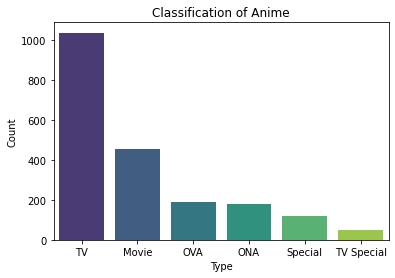

In [21]:
types = df['type'].value_counts()

# Convert value_counts to a DataFrame for easier plotting
types = types.reset_index()
types.columns = ['type', 'count']

# Plot using seaborn
sns.barplot(x='type', y='count', data=types, palette='viridis')
plt.title('Classification of Anime')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

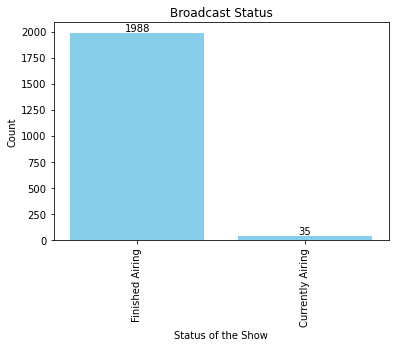

In [22]:
status = df['status'].value_counts()

status.plot(kind='bar', color='green')
bars = plt.bar(status.index, status.values, color='skyblue')
plt.title('Broadcast Status')
plt.xlabel('Status of the Show')
plt.ylabel('Count')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()

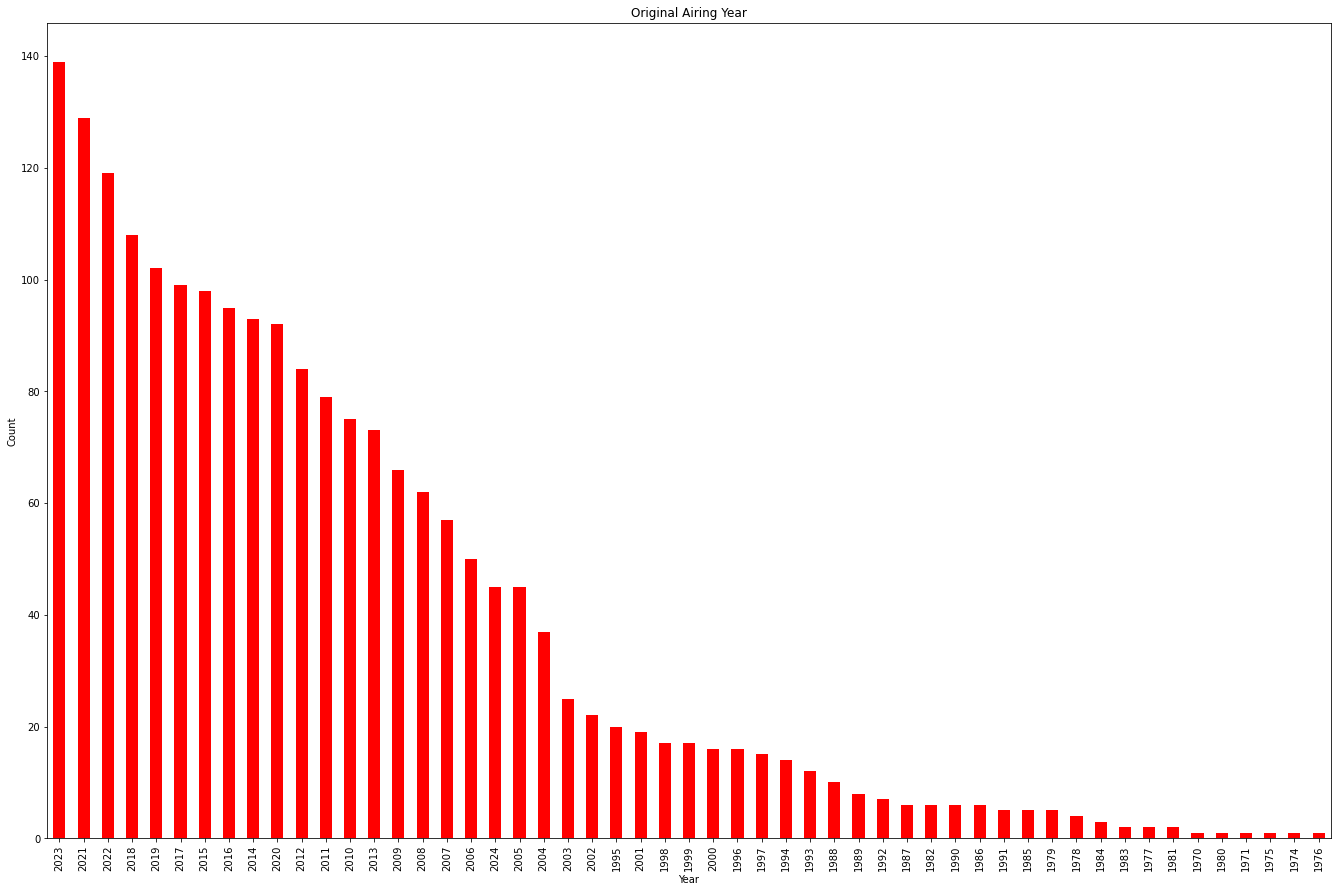

In [23]:
start_year = df['start_year'].value_counts()

plt.figure(figsize=(23, 15))
start_year.plot(kind = 'bar', color = 'red')
plt.title('Original Airing Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

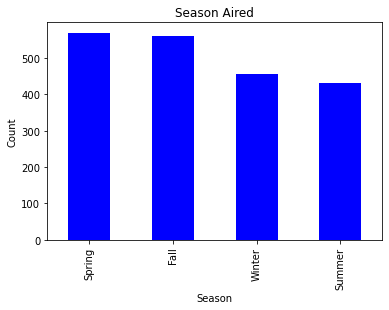

In [24]:
season = df['season'].value_counts()

season.plot(kind = 'bar', color = 'blue')
plt.title('Season Aired')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

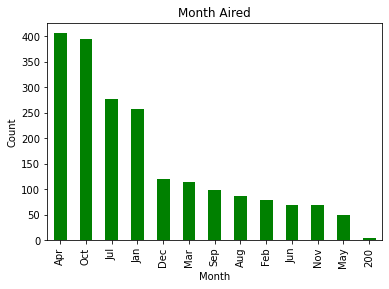

In [25]:
month = df['month'].value_counts()

month.plot(kind = 'bar', color = 'green')
plt.title('Month Aired')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [26]:
df['licensors'].value_counts().head(20)

['add some']                                        856
['Funimation']                                      299
['Sentai Filmworks']                                234
['Aniplex of America']                              105
['Discotek Media']                                   62
['VIZ Media']                                        60
['GKIDS']                                            29
['NIS America, Inc.']                                26
['Nozomi Entertainment']                             20
['Funimation', 'Crunchyroll']                        20
['Funimation', 'Bandai Entertainment']               16
['Crunchyroll']                                      15
['Funimation', 'Geneon Entertainment USA']           15
['ADV Films', 'Funimation']                          11
['Eleven Arts']                                      10
['Nozomi Entertainment', 'Bandai Entertainment']      9
['Disney Platform Distribution', 'GKIDS']             8
['Geneon Entertainment USA']                    

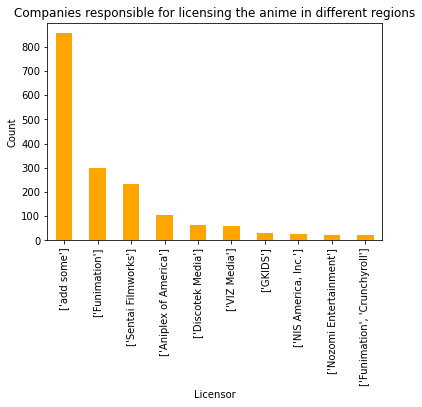

In [27]:
licensors = df['licensors'].value_counts().head(10)

licensors.plot(kind = 'bar', color = 'orange')
plt.title('Companies responsible for licensing the anime in different regions')
plt.xlabel('Licensor')
plt.ylabel('Count')
plt.show()

In [28]:
df['studios'].value_counts().head(15)

Production I.G       112
Toei Animation        98
Sunrise               97
Madhouse              90
TMS Entertainment     77
J.C.Staff             76
Studio Deen           75
A-1 Pictures          69
Bones                 63
Kyoto Animation       60
Pierrot               49
Shaft                 45
Wit Studio            32
Shin-Ei Animation     32
MAPPA                 30
Name: studios, dtype: int64

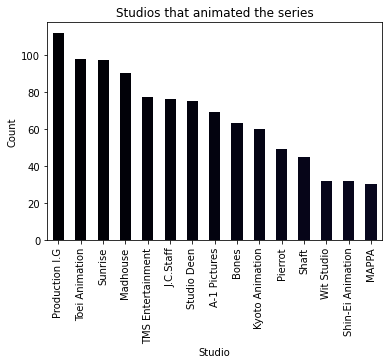

In [29]:
studios = df['studios'].value_counts().head(15)

colormap = plt.cm.get_cmap('magma').colors
studios.plot(kind = 'bar', color = colormap)
plt.title('Studios that animated the series')
plt.xlabel('Studio')
plt.ylabel('Count')
plt.show()

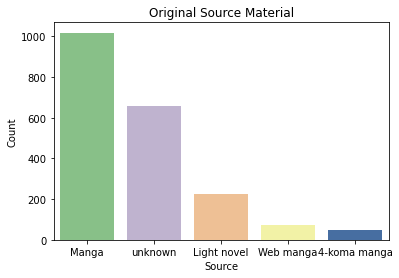

In [30]:
source = df['source'].value_counts().reset_index()
source.columns = ['source', 'count']


sns.barplot(x='source', y='count', data=source, palette='Accent')
plt.title('Original Source Material')
plt.xlabel('Source')
plt.ylabel('Count')
plt.show()

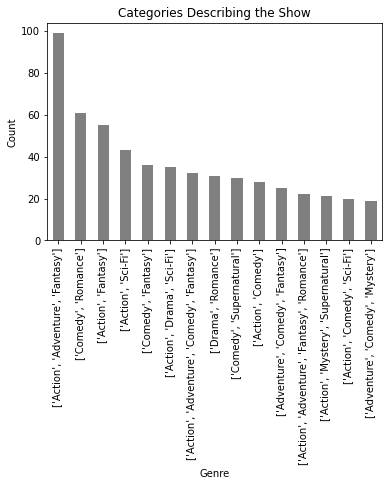

In [31]:
genre = df['genres'].value_counts().iloc[1:16]

genre.plot(kind = 'bar', color = 'Grey')
plt.title('Categories Describing the Show')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [32]:
df['score'].describe()

count    2023.000000
mean        7.848418
std         0.363651
min         7.400000
25%         7.550000
50%         7.750000
75%         8.080000
max         9.360000
Name: score, dtype: float64

In [33]:
df['score'].max()

9.36

In [34]:
max_index = df['score'].idxmax()
max_row = df.loc[max_index]
max_row

name                                          Sousou no Frieren
type                                                         TV
episodes                                                     28
status                                          Finished Airing
producers     ['Aniplex', 'Dentsu', 'Shogakukan-Shueisha Pro...
licensors                                          ['add some']
studios                                                Madhouse
source                                                    Manga
genres                        ['Adventure', 'Drama', 'Fantasy']
duration                                        24 min. per ep.
rating                                PG-13 - Teens 13 or older
score                                                      9.36
ranked                                                       #1
popularity                                                 #259
favorites                                                43,524
start_year                              

In [35]:
df['popularity'] = df['popularity'].str.replace('#', '').astype(int)

In [36]:
max_index = df['popularity'].idxmin()
max_row = df.loc[max_index]


max_row

name                                         Shingeki no Kyojin
type                                                         TV
episodes                                                     25
status                                          Finished Airing
producers     ['Production I.G', 'Dentsu', 'Mainichi Broadca...
licensors                                        ['Funimation']
studios                                              Wit Studio
source                                                    Manga
genres         ['Action', 'Award Winning', 'Drama', 'Suspense']
duration                                        24 min. per ep.
rating                           R - 17+ (violence & profanity)
score                                                      8.55
ranked                                                     #105
popularity                                                    1
favorites                                               172,447
start_year                              

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023 entries, 0 to 2022
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        2023 non-null   object 
 1   type        2023 non-null   object 
 2   episodes    2023 non-null   object 
 3   status      2023 non-null   object 
 4   producers   2023 non-null   object 
 5   licensors   2023 non-null   object 
 6   studios     2023 non-null   object 
 7   source      2023 non-null   object 
 8   genres      2023 non-null   object 
 9   duration    2023 non-null   object 
 10  rating      2023 non-null   object 
 11  score       2023 non-null   float64
 12  ranked      2023 non-null   object 
 13  popularity  2023 non-null   int64  
 14  favorites   2023 non-null   object 
 15  start_year  2023 non-null   object 
 16  season      2018 non-null   object 
 17  month       2023 non-null   object 
dtypes: float64(1), int64(1), object(16)
memory usage: 284.6+ KB


In [38]:
df['favorites'] = df['favorites'].str.replace(',', '').astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023 entries, 0 to 2022
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        2023 non-null   object 
 1   type        2023 non-null   object 
 2   episodes    2023 non-null   object 
 3   status      2023 non-null   object 
 4   producers   2023 non-null   object 
 5   licensors   2023 non-null   object 
 6   studios     2023 non-null   object 
 7   source      2023 non-null   object 
 8   genres      2023 non-null   object 
 9   duration    2023 non-null   object 
 10  rating      2023 non-null   object 
 11  score       2023 non-null   float64
 12  ranked      2023 non-null   object 
 13  popularity  2023 non-null   int64  
 14  favorites   2023 non-null   int64  
 15  start_year  2023 non-null   object 
 16  season      2018 non-null   object 
 17  month       2023 non-null   object 
dtypes: float64(1), int64(2), object(15)
memory usage: 284.6+ KB


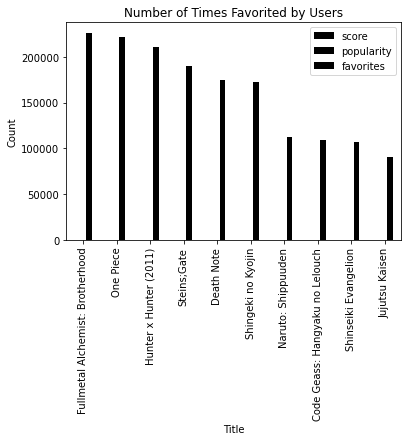

In [39]:
favourite = df.sort_values(by = 'favorites', ascending = False).head(10)

favourite.plot(kind = 'bar', x = 'name', color = 'black')
plt.title('Number of Times Favorited by Users')
plt.xlabel('Title')
plt.ylabel('Count')
plt.show()

In [40]:
df['episodes'] = pd.to_numeric(df['episodes'], errors = 'coerce')

top_10_episodes = df.nlargest(10, 'episodes')
print("Top 10 anime with the highest number of episodes:")
top_10_episodes[['name', 'episodes']]

Top 10 anime with the highest number of episodes:


,name,episodes
839,Doraemon (1979),1787.0
272,Naruto: Shippuuden,500.0
1603,Wushen Zhuzai,496.0
941,Kochira Katsushikaku Kameari Kouenmae Hashutsujo,373.0
662,Bleach,366.0
1114,Keroro Gunsou,358.0
364,Dragon Ball Z,291.0
228,Douluo Dalu 2nd Season,237.0
1721,Yu☆Gi☆Oh! Duel Monsters,224.0
581,Naruto,220.0
